# Assignment: Feature Engineering
Perform feature engineering techniques on the Titanic Dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Cost Functions
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Scalers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

# Feature Engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# Plot style
plt.style.use("seaborn-whitegrid")

import warnings
warnings.filterwarnings('ignore')

1. Create a Logistic Regression using the titanic dataset.
2. Start by making a model that only uses numerical features and predicts the "survived" column.

In [2]:
# Load Data
df = sns.load_dataset("Titanic").dropna()
df = df.drop('adult_male', axis = 1)
df["survived"] = df["survived"].astype(bool)

In [3]:
df.shape

(182, 14)

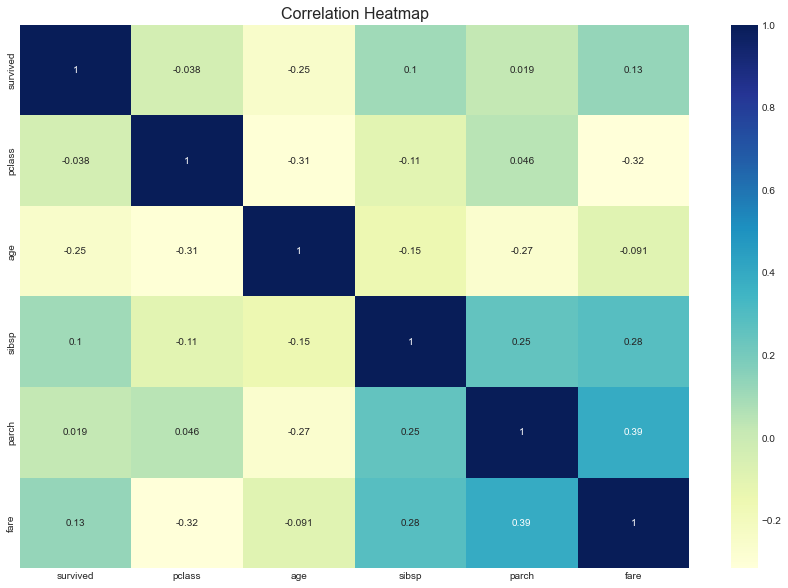

In [262]:
# Set the width and height of the figure
plt.figure(figsize=(15,10))
# Add title
plt.title("Correlation Heatmap", size=16)
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
#plt.savefig("corr_heatmap.png", format="png", dpi=1200)
plt.show()

In [4]:
# What is our baseline model?

df["survived"].value_counts(normalize=True)

True     0.675824
False    0.324176
Name: survived, dtype: float64

In [5]:
# Splitting data

# Split into training and test sets
training, test = train_test_split(
    df, 
    train_size=0.8, # 80% of data to train
    test_size=0.2, # 20% of data to test
    random_state=42
)

In [6]:
# Check class labels distribution in training
training["survived"].value_counts(normalize=True)

True     0.682759
False    0.317241
Name: survived, dtype: float64

In [7]:
# Check class labels distribution in test
# Conclusion --> the data points in the test is representative of the data in the training
# Note: representative does ot mean they are equal "they have different features"

test["survived"].value_counts(normalize=True)

True     0.648649
False    0.351351
Name: survived, dtype: float64

In [8]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,deck,embark_town,alive,alone
1,True,1,female,38.0,1,0,71.2833,C,First,woman,C,Cherbourg,yes,False
3,True,1,female,35.0,1,0,53.1000,S,First,woman,C,Southampton,yes,False
6,False,1,male,54.0,0,0,51.8625,S,First,man,E,Southampton,no,True
10,True,3,female,4.0,1,1,16.7000,S,Third,child,G,Southampton,yes,False
11,True,1,female,58.0,0,0,26.5500,S,First,woman,C,Southampton,yes,True


#### Splitting training data into training and validations sets

In [9]:
# in each split we should have feature set (these are the independent variables)
# and the class or the (dependant variable)

# Example --> y = x1 + x2 - 4x3 
# the feature set --> x1, x2, x3
# class/target set --> y 

# Create Validation Set

# Select target column
target = "survived"

# feature set "X_train" and "X_test" --> PRCP, TMAX, TMIN
# target set --> Rain 

# Create training and validation sets
X_train, X_val, y_train, y_val,= train_test_split(
    # we are dropping the traget and the date
    training.drop([target,'sex','embarked','class','who',\
                  'deck','embark_town','alive','alone'], axis=1), # Df with features
    
    training[target], # Df with labels
    
    train_size=0.8,
    test_size=0.2,
    random_state=42
)

In [10]:
X_train.shape

(116, 5)

In [11]:
X_val.shape

(29, 5)

In [12]:
# logistic Regression --> is used for classification (categorical prediction "not continous")
lr = LogisticRegression() # Create the model

# Training step
lr.fit(X_train, y_train) # Fit the model

# Testing step
lr.score(X_val, y_val) # Score the model

0.7241379310344828

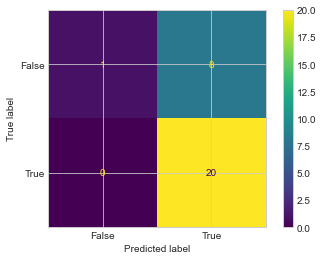

In [13]:
# Look at confusion matrix for more detail
plot_confusion_matrix(lr, X_val, y_val);

In [14]:
# precision is column and recall is row 

# precision for False "column" --> 1/ 1+0
# recall for False "row" --> 1/ 1+8

# Look at classification report

# store predictions
preds = lr.predict(X_val)

print(classification_report(y_val, preds))

              precision    recall  f1-score   support

       False       1.00      0.11      0.20         9
        True       0.71      1.00      0.83        20

    accuracy                           0.72        29
   macro avg       0.86      0.56      0.52        29
weighted avg       0.80      0.72      0.64        29



----------------------------------------------------------------------------

3. Make different models utilizing the feature engineering techniques learned in class.

In [15]:
df["survived"] = df["survived"].astype(int)

# original dataset (100 records 80%20%) --> init_train (80 records) and test (20 records)
# init_train (80 records 80%20%) --> train_actual (64 records) and vali (16 records)

# EDA will happen on init_train --> train the model on train_actual --> test in vali
# keep looping until you are happy about the model performance 

# test the model on the blind dataset "test"


# Split Data
train, test = train_test_split(
    df, 
    train_size = .80,
    test_size =.20,
    random_state=42
)

train, val = train_test_split(
    train,
    train_size = .80,
    test_size = .20,
    random_state=42
)

In [16]:
df.shape

(182, 14)

In [17]:
# train_set = df X 0.8 X 0.8 = 53940 X 0.8 X 0.8 = 116 records

train.shape

(116, 14)

In [18]:
# validation_set = df X 0.8 X 0.2 = 53940 X 0.8 X 0.2 = 29 records

val.shape

(29, 14)

In [19]:
# test_set = df X 0.2 = 53940 X 0.2 = 37 records

test.shape

(37, 14)

In [20]:
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,deck,embark_town,alive,alone
581,1,1,female,39.0,1,1,110.8833,C,First,woman,C,Cherbourg,yes,False
248,1,1,male,37.0,1,1,52.5542,S,First,man,D,Southampton,yes,False
621,1,1,male,42.0,1,0,52.5542,S,First,man,D,Southampton,yes,False
309,1,1,female,30.0,0,0,56.9292,C,First,woman,E,Cherbourg,yes,True
823,1,3,female,27.0,0,1,12.4750,S,Third,woman,E,Southampton,yes,False


In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116 entries, 581 to 311
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     116 non-null    int32  
 1   pclass       116 non-null    int64  
 2   sex          116 non-null    object 
 3   age          116 non-null    float64
 4   sibsp        116 non-null    int64  
 5   parch        116 non-null    int64  
 6   fare         116 non-null    float64
 7   embarked     116 non-null    object 
 8   class        116 non-null    object 
 9   who          116 non-null    object 
 10  deck         116 non-null    object 
 11  embark_town  116 non-null    object 
 12  alive        116 non-null    object 
 13  alone        116 non-null    bool   
dtypes: bool(1), float64(2), int32(1), int64(3), object(7)
memory usage: 12.3+ KB


In [22]:
# Model with only numeric features
train.dtypes

survived         int32
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
deck            object
embark_town     object
alive           object
alone             bool
dtype: object

In [23]:
# This is used to return only numeric columns 

(df.dtypes != "category").values & (df.dtypes != "object").values 

array([ True,  True, False,  True,  True,  True,  True, False, False,
       False, False, False, False,  True])

In [24]:
def cleaner(df):
    
    "Return Only Numeric Features"
    
    # Create boolean array with only columns that are float64
    columns_bool = (df.dtypes != "category").values & (df.dtypes != "object").values
                  # & (df.dtypes != "bool").values

    # Return only numeric columns
    df = df.iloc[:, columns_bool].dropna()

    return df

# applying the function on both the training and validation sets
train_numeric = cleaner(train)
val_numeric = cleaner(val)

In [25]:
# Create X, y train and validation sets

target = "survived"

# feature set --> everything except for survived --> X_train
# target set/column --> survived --> y_train

X_train = train_numeric.drop([target,'alone'], axis=1)
y_train = train_numeric[target]

X_val = val_numeric.drop([target,'alone'], axis=1)
y_val = val_numeric[target]

In [26]:
X_train.head()

,pclass,age,sibsp,parch,fare
581,1,39.0,1,1,110.8833
248,1,37.0,1,1,52.5542
621,1,42.0,1,0,52.5542
309,1,30.0,0,0,56.9292
823,3,27.0,0,1,12.4750


In [27]:
lr = LinearRegression()
lr.fit(X_train, y_train)

# This return the R^2 score
lr.score(X_val, y_val)

0.008903573819197153

In [28]:
# The linear model has 5 coeffecients because we have 5 columns in the training set
lr.coef_

array([-0.07626865, -0.0070535 , -0.04575746, -0.0343008 ,  0.00075009])

In [29]:
lr.intercept_

1.0015259371663028

In [30]:
pd.concat([X_train, y_train], axis = 1)

,pclass,age,sibsp,parch,fare,survived
581,1,39.0,1,1,110.8833,1
248,1,37.0,1,1,52.5542,1
621,1,42.0,1,0,52.5542,1
309,1,30.0,0,0,56.9292,1
823,3,27.0,0,1,12.4750,1
...,...,...,...,...,...,...
689,1,15.0,0,1,211.3375,1
356,1,22.0,0,1,55.0000,1
772,2,57.0,0,0,10.5000,0
205,3,2.0,0,1,10.4625,0


### Using Model for one record prediction

In [31]:
# predicting resutls from the model
# This should give us the survived (1 = survived, 0 = didn't survive) 

np.round(lr.predict([[1, 39.0, 1, 1, 110.8833]]))

array([1.])

In [32]:
# Calculates the cost functions
def calc_cost(y_true, y_predict):
    
    "Calculate Cost Functions and print output"
    
    result_dict = {}
    
    mse = mean_squared_error(y_true, y_predict)
    mae = mean_absolute_error(y_true, y_predict)
    rmse = mean_squared_error(y_true, y_predict, squared=False)
    
    ls = [mse, mae, rmse]
    ls2 = ["MSE", "MAE", "RMSE"]
    
    for x in range(len(ls)):
        print(f"{ls2[x]}: {ls[x]}")
        result_dict[ls2[x]] = ls[x]
    
    return result_dict

# Save results to object and print results
print("Baseline")

# The baseline model --> replace values by the mean and calculate the cost functions
# Baseline is concerned with the average value
b_preds = [y_train.mean() for x in range(len(y_train))]

res0 = calc_cost(y_train, b_preds)

print("\nLinear Regression")
res1 = calc_cost(y_train, lr.predict(X_train))

Baseline
MSE: 0.21722651605231863
MAE: 0.43445303210463726
RMSE: 0.46607565485907826

Linear Regression
MSE: 0.20294158434325146
MAE: 0.4073314043497342
RMSE: 0.45049038207630077


In [33]:
# Since the value is positive --> the regression model is better than the Baseline model

res0['MSE']-res1['MSE']

0.014284931709067167

## Feature Scaling

In [34]:
# Instantiate Scaler Object
scaler = StandardScaler()

# Apply to X data --> only numeric columns 
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Look at the transformed data
X_train_scaled[:5]

array([[-0.42707135,  0.29327793,  0.85159407,  0.72764868,  0.47582955],
       [-0.42707135,  0.16230492,  0.85159407,  0.72764868, -0.2434915 ],
       [-0.42707135,  0.48973744,  0.85159407, -0.59121455, -0.2434915 ],
       [-0.42707135, -0.29610062, -0.69192018, -0.59121455, -0.18953851],
       [ 2.98949944, -0.49256014, -0.69192018,  0.72764868, -0.73775272]])

In [35]:
# Train the model
lr2 = LinearRegression()
lr2.fit(X_train_scaled, y_train)
lr2.score(X_val_scaled, y_val)

0.008903573819197486

In [36]:
res2 = calc_cost(y_val, lr2.predict(X_val_scaled))

MSE: 0.21212527552026691
MAE: 0.42011847756636184
RMSE: 0.4605705977592001


In [37]:
res1

{'MSE': 0.20294158434325146,
 'MAE': 0.4073314043497342,
 'RMSE': 0.45049038207630077}

In [38]:
delta_1 = res0['MSE']-res1['MSE']
delta_2 = res1['MSE']-res2['MSE']

print(f'Difference between baseline and 1st model {(delta_1)}')

print(f'Difference between 1st and 2nd model {(delta_2)}')

Difference between baseline and 1st model 0.014284931709067167
Difference between 1st and 2nd model -0.009183691177015452


Difference between the Linear Regression model and the Feature Scaling model model
is negative, that's mean the Linear Regression model gave better result than the
Feature Scaling model.

In [39]:
lr2.coef_

array([-0.04464632, -0.1077092 , -0.02964499, -0.02600786,  0.06082383])

In [40]:
pd.DataFrame(X_train_scaled).describe()

,0,1,2,3,4
count,1.160000e+02,1.160000e+02,1.160000e+02,1.160000e+02,1.160000e+02
mean,7.943837e-17,1.607909e-16,-1.914178e-17,-7.656711e-18,1.225074e-16
std,1.004338e+00,1.004338e+00,1.004338e+00,1.004338e+00,1.004338e+00
min,-4.270713e-01,-2.129723e+00,-6.919202e-01,-5.912145e-01,-8.915958e-01
25%,-4.270713e-01,-6.890197e-01,-6.919202e-01,-5.912145e-01,-5.533494e-01
50%,-4.270713e-01,-6.689785e-02,-6.919202e-01,-5.912145e-01,-2.401261e-01
75%,-4.270713e-01,7.271260e-01,8.515941e-01,7.276487e-01,1.348981e-01
max,2.989499e+00,2.978225e+00,3.938623e+00,4.684238e+00,5.426506e+00


#### Looking at the Parameters of the Model (Weights)

We can look at calculated parameters of the model side by side and notice the scales have changed. Looking at the parameters of the model can help us understand which features or more important. 

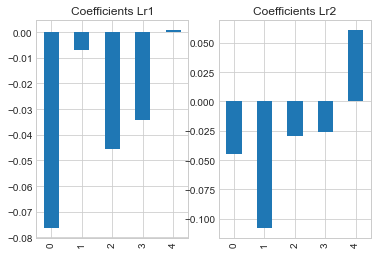

In [41]:
fig, ax = plt.subplots(1,2)

pd.Series(lr.coef_).plot(kind="bar", title="Coefficients Lr1", ax=ax[0])
pd.Series(lr2.coef_).plot(kind="bar", title="Coefficients Lr2", ax=ax[1]);

#### Robust Scaler

Scale features using statistics that are robust to outliers.

In [42]:
# Instantiate Scaler Object
scaler2 = RobustScaler()

# Apply to X data
X_train_robust = scaler2.fit_transform(X_train)
X_val_robust = scaler2.transform(X_val)

# Look at the transformed data
X_train_robust[:5]

array([[ 0.        ,  0.25433526,  1.        ,  1.        ,  1.04025892],
       [ 0.        ,  0.16184971,  1.        ,  1.        , -0.00488986],
       [ 0.        ,  0.39306358,  1.        ,  0.        , -0.00488986],
       [ 0.        , -0.16184971,  0.        ,  0.        ,  0.07350199],
       [ 2.        , -0.30057803,  0.        ,  1.        , -0.72303444]])

In [43]:
# Train the model
lr3 = LinearRegression()
lr3.fit(X_train_robust, y_train)
lr3.score(X_val_robust, y_val)

0.008903573819197041

In [44]:
res3 = calc_cost(y_val, lr3.predict(X_val_robust))

MSE: 0.21212527552026703
MAE: 0.42011847756636184
RMSE: 0.46057059775920023


In [45]:
lr3.coef_

array([-0.07626865, -0.15253192, -0.04575746, -0.0343008 ,  0.04186185])

In [46]:
delta_1 = res0['MSE']-res1['MSE']
delta_2 = res1['MSE']-res2['MSE']
delta_3 = res2['MSE']-res3['MSE']

print(f'Difference between baseline and 1st model {(delta_1)}')

print(f'Difference between 1st and 2nd model {(delta_2)}')

# We did not get any improvements, in fact it's not good as the Linear Regression model
print(f'Difference between 2nd and 3rd model {(delta_3)}')

Difference between baseline and 1st model 0.014284931709067167
Difference between 1st and 2nd model -0.009183691177015452
Difference between 2nd and 3rd model -1.1102230246251565e-16


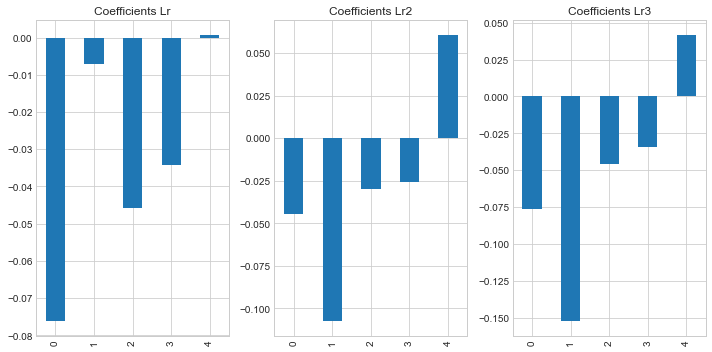

In [47]:
fig, ax = plt.subplots(1,3)

pd.Series(lr.coef_).plot(kind="bar", title="Coefficients Lr", ax=ax[0])
pd.Series(lr2.coef_).plot(kind="bar", title="Coefficients Lr2", ax=ax[1])
pd.Series(lr3.coef_).plot(kind="bar", title="Coefficients Lr3", ax=ax[2], figsize=(10,5))
plt.tight_layout();

#### Min Max Scaler

Transform features by scaling each feature to a given range.

In [48]:
# Instantiate Scaler Object
scaler3 = MinMaxScaler()

# Apply to X data
X_train_mm = scaler3.fit_transform(X_train)
X_val_mm = scaler3.transform(X_val)

# Look at the transformed data
X_train_mm[:5]

array([[0.        , 0.47435897, 0.33333333, 0.25      , 0.21642979],
       [0.        , 0.44871795, 0.33333333, 0.25      , 0.10257897],
       [0.        , 0.51282051, 0.33333333, 0.        , 0.10257897],
       [0.        , 0.35897436, 0.        , 0.        , 0.1111184 ],
       [1.        , 0.32051282, 0.        , 0.25      , 0.02434958]])

In [49]:
# Train the model
lr4 = LinearRegression()
lr4.fit(X_train_mm, y_train)
lr4.score(X_val_mm, y_val)

0.008903573819197041

In [50]:
res4 = calc_cost(y_val, lr4.predict(X_val_mm))

MSE: 0.21212527552026703
MAE: 0.42011847756636184
RMSE: 0.46057059775920023


In [51]:
lr4.coef_

array([-0.1525373 , -0.55017293, -0.13727237, -0.13720322,  0.38429117])

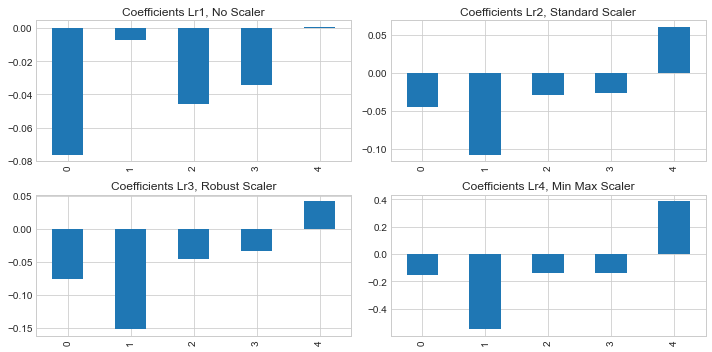

In [52]:
fig, ax = plt.subplots(2,2)

pd.Series(lr.coef_).plot(kind="bar", title="Coefficients Lr1, No Scaler", ax=ax[0,0])
pd.Series(lr2.coef_).plot(kind="bar", title="Coefficients Lr2, Standard Scaler", ax=ax[0,1])
pd.Series(lr3.coef_).plot(kind="bar", title="Coefficients Lr3, Robust Scaler", ax=ax[1,0])
pd.Series(lr4.coef_).plot(kind="bar", title="Coefficients Lr4, Min Max Scaler", ax=ax[1,1], figsize=(10,5))

plt.tight_layout();

## Feature Engineering

In [53]:
train.describe(exclude="number")

,sex,embarked,class,who,deck,embark_town,alive,alone
count,116,116,116,116,116,116,116,116
unique,2,3,3,3,7,3,2,2
top,male,S,First,man,C,Southampton,yes,False
freq,60,76,96,56,29,76,79,62


In [54]:
# Create our One Hot Encoder object
one_hot = OneHotEncoder()

col_names = ["who"]

# One Hot encode the column in both the train and validation sets
one_hot_df = one_hot.fit_transform(train[col_names]).toarray()

one_hot_df_val = one_hot.transform(val[col_names]).toarray()

In [55]:
# Look at the categories
one_hot.categories_

[array(['child', 'man', 'woman'], dtype=object)]

In [56]:
one_hot_df

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0

In [57]:
col_names

['who']

In [58]:
# Create column names list for one hot encoded features
column_names = []

for y in range(len(one_hot.categories_)):
    for z in range(len(one_hot.categories_[y])):
        # print(one_hot.categories_[y][z])
        column_names.append(col_names[y]+"_"+one_hot.categories_[y][z])


column_names

['who_child', 'who_man', 'who_woman']

In [59]:
def col_names(one_hot_model):
    
    "Create columns names list for one hot encoded feature"
    
    column_names = []
    
    col_names = ["who"]

    for y in range(len(one_hot_model.categories_)):
        for z in range(len(one_hot_model.categories_[y])):
            # print(one_hot.categories_[y][z])
            column_names.append(col_names[y]+"_"+one_hot_model.categories_[y][z])
            
    return column_names

column_names = col_names(one_hot)

In [60]:
# Values for each row
# who has 3 variations
# number of columns --> 3

one_hot_df.shape

(116, 3)

In [61]:
# Cast One Hot Encoded values into a dataframe

oh_df = pd.DataFrame(
    one_hot_df,
    index=train.index,
    columns = column_names
)

oh_df_val = pd.DataFrame(
    one_hot_df_val,
    index=val.index,
    columns = column_names
)

print(oh_df.shape)
print(oh_df_val.shape)

(116, 3)
(29, 3)


In [203]:
# Create train_new df by merging train and one hot encoded df together and drop color and clarity cols

train_new = train.merge(oh_df, on=train.index).set_index("key_0").drop(["who"], axis=1)
val_new = val.merge(oh_df_val, on=val.index).set_index("key_0").drop(["who"], axis=1)

print(train_new.shape)
print(val_new.shape)

(116, 16)
(29, 16)


In [204]:
train_new

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alive,alone,who_child,who_man,who_woman
key_0,,,,,,,,,,,,,,,,
581,1,1,female,39.0,1,1,110.8833,C,First,C,Cherbourg,yes,False,0.0,0.0,1.0
248,1,1,male,37.0,1,1,52.5542,S,First,D,Southampton,yes,False,0.0,1.0,0.0
621,1,1,male,42.0,1,0,52.5542,S,First,D,Southampton,yes,False,0.0,1.0,0.0
309,1,1,female,30.0,0,0,56.9292,C,First,E,Cherbourg,yes,True,0.0,0.0,1.0
823,1,3,female,27.0,0,1,12.4750,S,Third,E,Southampton,yes,False,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
689,1,1,female,15.0,0,1,211.3375,S,First,B,Southampton,yes,False,1.0,0.0,0.0
356,1,1,female,22.0,0,1,55.0000,S,First,E,Southampton,yes,False,0.0,0.0,1.0
772,0,2,female,57.0,0,0,10.5000,S,Second,E,Southampton,no,True,0.0,0.0,1.0


#### Ordinal Encoder 

In [205]:
train_new = train_new.drop(["alone","sex","embarked","class","deck","embark_town","alive"], axis =1)
val_new = val_new.drop(["alone","sex","embarked","class","deck","embark_town","alive"], axis =1)

In [206]:
ordinal = OrdinalEncoder()

col_names2 = ["sex","embarked","class","deck","embark_town"]

# Ordinal encode the column
ordinal_ls = ordinal.fit_transform(train[col_names2])
ordinal_ls_val = ordinal.transform(val[col_names2])

In [207]:
# Look at categories
ordinal.categories_

[array(['female', 'male'], dtype=object),
 array(['C', 'Q', 'S'], dtype=object),
 array(['First', 'Second', 'Third'], dtype=object),
 array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object),
 array(['Cherbourg', 'Queenstown', 'Southampton'], dtype=object)]

In [208]:
ordinal_ls

array([[0., 0., 0., 2., 0.],
       [1., 2., 0., 3., 2.],
       [1., 2., 0., 3., 2.],
       [0., 0., 0., 4., 0.],
       [0., 2., 2., 4., 2.],
       [0., 0., 0., 1., 0.],
       [1., 2., 0., 2., 2.],
       [1., 0., 0., 2., 0.],
       [1., 2., 2., 4., 2.],
       [1., 2., 0., 0., 2.],
       [1., 2., 0., 3., 2.],
       [0., 2., 0., 3., 2.],
       [0., 2., 0., 1., 2.],
       [0., 2., 0., 3., 2.],
       [1., 2., 0., 2., 2.],
       [1., 2., 0., 0., 2.],
       [1., 0., 0., 2., 0.],
       [0., 0., 0., 3., 0.],
       [1., 2., 1., 3., 2.],
       [0., 2., 0., 1., 2.],
       [0., 2., 0., 4., 2.],
       [1., 2., 0., 3., 2.],
       [0., 2., 0., 1., 2.],
       [1., 0., 0., 1., 0.],
       [1., 2., 0., 2., 2.],
       [1., 2., 0., 4., 2.],
       [1., 2., 0., 4., 2.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 2., 0.],
       [0., 2., 0., 2., 2.],
       [1., 2., 2., 5., 2.],
       [0., 2., 0., 3., 2.],
       [1., 2., 0., 2., 2.],
       [0., 0., 0., 2., 0.],
       [0., 2.

In [209]:
ordinal.categories_[0]

array(['female', 'male'], dtype=object)

In [210]:
def col_names2(ordinal_model):
    
    "Create columns names list for one hot encoded feature"
    
    column_names = []
    
    col_names = ["sex","embarked","class","deck","embark_town"]

    for y in range(len(ordinal.categories_)):
        column_names.append(col_names[y])
            
    return column_names

column_names = col_names2(ordinal)

In [211]:
# Cast One Hot Encoded values into a dataframe

ordinal_df = pd.DataFrame(
    ordinal_ls,
    index=train.index,
    columns = column_names
)

ordinal_df_val = pd.DataFrame(
    ordinal_ls_val,
    index=val.index,
    columns = column_names
)

print(ordinal_df.shape)
print(ordinal_df_val.shape)

(116, 5)
(29, 5)


In [212]:
# Create train_new df by merging train and one hot encoded df together and drop color and clarity cols

train_new = train_new.merge(ordinal_df, on=train.index).set_index("key_0")
val_new = val_new.merge(ordinal_df_val, on=val.index).set_index("key_0")

print(train_new.shape)
print(val_new.shape)

(116, 14)
(29, 14)


In [213]:
train_new

,survived,pclass,age,sibsp,parch,fare,who_child,who_man,who_woman,sex,embarked,class,deck,embark_town
key_0,,,,,,,,,,,,,,
581,1,1,39.0,1,1,110.8833,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0
248,1,1,37.0,1,1,52.5542,0.0,1.0,0.0,1.0,2.0,0.0,3.0,2.0
621,1,1,42.0,1,0,52.5542,0.0,1.0,0.0,1.0,2.0,0.0,3.0,2.0
309,1,1,30.0,0,0,56.9292,0.0,0.0,1.0,0.0,0.0,0.0,4.0,0.0
823,1,3,27.0,0,1,12.4750,0.0,0.0,1.0,0.0,2.0,2.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
689,1,1,15.0,0,1,211.3375,1.0,0.0,0.0,0.0,2.0,0.0,1.0,2.0
356,1,1,22.0,0,1,55.0000,0.0,0.0,1.0,0.0,2.0,0.0,4.0,2.0
772,0,2,57.0,0,0,10.5000,0.0,0.0,1.0,0.0,2.0,1.0,4.0,2.0


In [214]:
val_new

,survived,pclass,age,sibsp,parch,fare,who_child,who_man,who_woman,sex,embarked,class,deck,embark_town
key_0,,,,,,,,,,,,,,
268,1,1,58.0,0,1,153.4625,0.0,0.0,1.0,0.0,2.0,0.0,2.0,2.0
523,1,1,44.0,0,1,57.9792,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
215,1,1,31.0,1,0,113.2750,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0
741,0,1,36.0,1,0,78.8500,0.0,1.0,0.0,1.0,2.0,0.0,2.0,2.0
659,0,1,58.0,0,2,113.2750,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0.0
269,1,1,35.0,0,0,135.6333,0.0,0.0,1.0,0.0,2.0,0.0,2.0,2.0
3,1,1,35.0,1,0,53.1000,0.0,0.0,1.0,0.0,2.0,0.0,2.0,2.0
662,0,1,47.0,0,0,25.5875,0.0,1.0,0.0,1.0,2.0,0.0,4.0,2.0
297,0,1,2.0,1,2,151.5500,1.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0


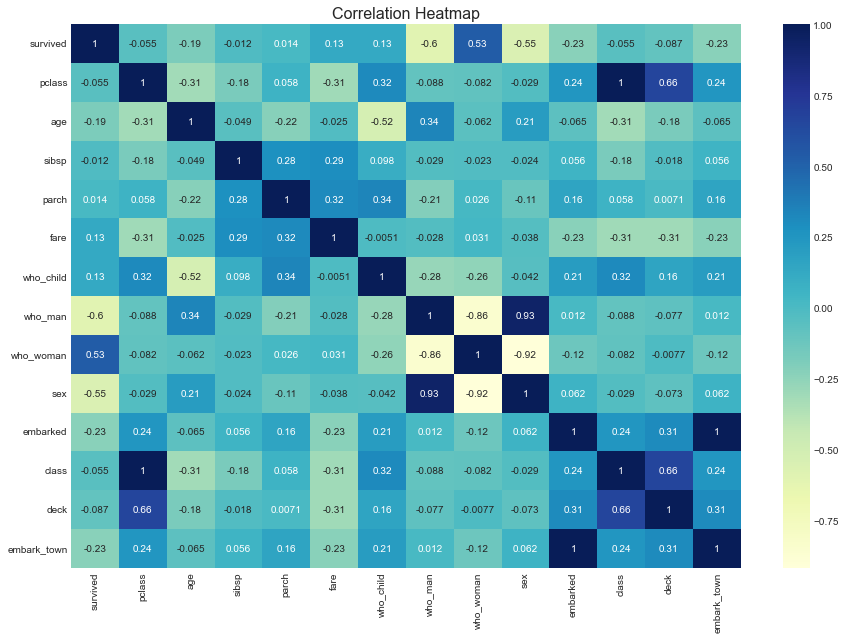

In [269]:
# Set the width and height of the figure
plt.figure(figsize=(15,10))
# Add title
plt.title("Correlation Heatmap", size=16)
sns.heatmap(train_new.corr(), annot=True, cmap="YlGnBu")
#plt.savefig("corr_heatmap.png", format="png", dpi=1200)
plt.show()

#### Model Using One Hot and Ordinally Encoded Features

In [215]:
target = "survived"

X_train = train_new.drop(target, axis=1)
y_train = train_new[target]

X_val = val_new.drop(target, axis=1)
y_val = val_new[target]

In [216]:
# Model
lr5 = LinearRegression()

lr5.fit(X_train, y_train)
lr5.score(X_val, y_val)

0.39234387184489494

In [217]:
res5 = calc_cost(y_val, lr5.predict(X_val))

MSE: 0.1300571974648263
MAE: 0.2723466712115409
RMSE: 0.36063443743606394


<AxesSubplot:title={'center':'Coefficients Lr5, Features Engineered'}>

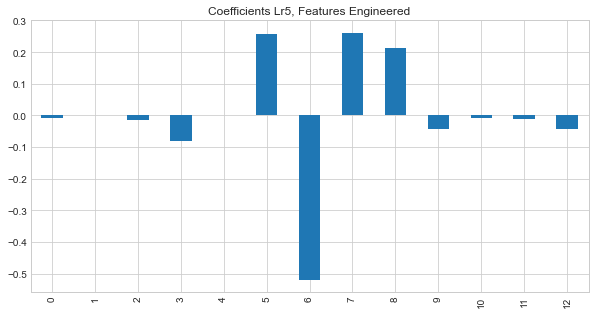

In [218]:
pd.Series(lr5.coef_).plot(kind="bar", title="Coefficients Lr5, Features Engineered",figsize=(10,5))

In [227]:
scores = cross_val_score(lr5, X_val, y_val, cv=10)
scores.mean()

-0.00939521610162245

In [285]:
target = "survived"

X_train = train_new.drop([target,'fare','pclass','sibsp','embark_town'], axis=1)
y_train = train_new[target]

X_val = val_new.drop([target,'fare','pclass','sibsp','embark_town'], axis=1)
y_val = val_new[target]

In [286]:
X_val

,age,parch,who_child,who_man,who_woman,sex,embarked,class,deck
key_0,,,,,,,,,
268,58.0,1,0.0,0.0,1.0,0.0,2.0,0.0,2.0
523,44.0,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0
215,31.0,0,0.0,0.0,1.0,0.0,0.0,0.0,3.0
741,36.0,0,0.0,1.0,0.0,1.0,2.0,0.0,2.0
659,58.0,2,0.0,1.0,0.0,1.0,0.0,0.0,3.0
269,35.0,0,0.0,0.0,1.0,0.0,2.0,0.0,2.0
3,35.0,0,0.0,0.0,1.0,0.0,2.0,0.0,2.0
662,47.0,0,0.0,1.0,0.0,1.0,2.0,0.0,4.0
297,2.0,2,1.0,0.0,0.0,0.0,2.0,0.0,2.0


In [287]:
# Model
lr6 = LinearRegression()

lr6.fit(X_train, y_train)
lr6.score(X_val, y_val)

0.3947470968795995

In [288]:
res6 = calc_cost(y_val, lr6.predict(X_val))

MSE: 0.12954283301031164
MAE: 0.27594209034115563
RMSE: 0.3599205926455329


<AxesSubplot:title={'center':'Coefficients Lr6, Features Engineered'}>

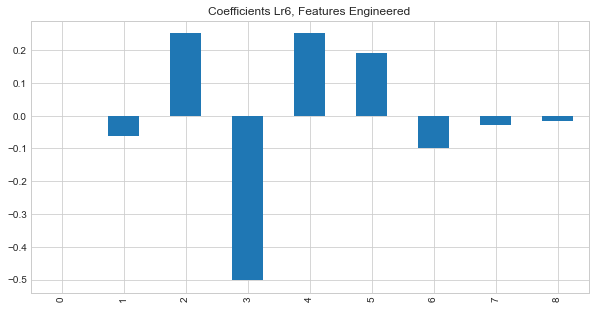

In [289]:
pd.Series(lr6.coef_).plot(kind="bar", title="Coefficients Lr6, Features Engineered",figsize=(10,5))

## Percent Decrease in the Cost Function

In [292]:
delta_mse = ((res1['MSE']- res5['MSE'])/res1['MSE'])*100
delta_mae = ((res1['MAE']- res5['MAE'])/res1['MAE'])*100
delta_rmse = ((res1['RMSE']- res5['RMSE'])/res1['RMSE'])*100

delta_ls = [round(delta_mse), round(delta_mae), round(delta_rmse)]
delta_ls2 = ["MSE % decrease", "MAE % decrease", "RMSE % decrease"]
    
for x in range(len(delta_ls)):
    print(f"{delta_ls2[x]}: {delta_ls[x]}")

MSE % decrease: 36
MAE % decrease: 33
RMSE % decrease: 20


In [291]:
delta_mse = ((res1['MSE']- res6['MSE'])/res1['MSE'])*100
delta_mae = ((res1['MAE']- res6['MAE'])/res1['MAE'])*100
delta_rmse = ((res1['RMSE']- res6['RMSE'])/res1['RMSE'])*100

delta_ls = [round(delta_mse), round(delta_mae), round(delta_rmse)]
delta_ls2 = ["MSE % decrease", "MAE % decrease", "RMSE % decrease"]
    
for x in range(len(delta_ls)):
    print(f"{delta_ls2[x]}: {delta_ls[x]}")

MSE % decrease: 36
MAE % decrease: 32
RMSE % decrease: 20


## Saving and Loading

In [222]:
# Used for saving out models
import joblib
import seaborn as sns
import datetime

In [293]:
# Save the model as todays date

joblib.dump(scaler, f"./day_02")
joblib.dump(one_hot, f"./day_02")
joblib.dump(ordinal, f"./day_02")
joblib.dump(lr5, f"./day_02")
joblib.dump(lr6, f"./day_02")

['./day_02']